# (Word Embedding Training, Visualization, Evaluation)
Word Vectors are often used as a fundamental component for downstream NLP tasks, e.g. question answering, text generation, translation, etc., so it is important to build some intuitions as to their strengths and weaknesses.  <br>
**Note on Terminology:**
The terms "word vectors" and "word embeddings" are often used interchangeably. The term "embedding" refers to the fact that we are encoding aspects of a word's meaning in a lower dimensional space. As Wikipedia states, "conceptually it involves a mathematical embedding from a space with one dimension per word to a continuous vector space with a much lower dimension".

# Collect Data
The dataset  contains  10 sentences. 

In [0]:
import numpy as np

In [0]:
corpus = ['king is a strong man', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen',
          'prince is a strong boy',
          'boy is strong',
          'girl is pretty',
          'girl will be woman',
          'boy will be man']


# Tokenization
For many NLP tasks, the first thing you need to do is to tokenize your raw text into lists of words. Suppose your have *text = "king is a strong man"*  You can just use *text.split("  ")* to break the sentences into a list of words. You will get output as "['king', 'is', 'a', 'strong', 'man']"
Write and run your code in the next cell to tokenize all the sentences. <br>


In [0]:
def Tokenization(corpus):
    '''
    Input:
      corpus: list of sentences(Eg., The list 'corpus' contains 10 sentences as defined above)
    
    Output:
           y: list of lists, each sentence in corpus is broken into a list of words (obtained by tokenizing all the sentences)
    '''
    # YOUR CODE HERE
    y=[]
    for line in corpus:
      y.append(line.split())
    return y

In [5]:
'''test for Tokenization'''
def test_Tokenization():
  y = Tokenization(corpus)
  assert y[0]==['king', 'is', 'a', 'strong', 'man']
  assert y[9]==['princess', 'is', 'a', 'girl', 'will', 'be', 'queen']
  print('Test passed', '\U0001F44D')
test_Tokenization()

Test passed 👍


# Remove stop words
## Stopwords: 
Words such as articles and some verbs are usually considered stop words because they don’t help us to find the context or the true meaning of a sentence. These are words that can be removed without any negative consequences to the final model that you are training.
In order for efficiency of creating word vectors, we will remove commonly used words.<br>
For our case, lets take following list as stopwords. <br>
stop_words = ['is', 'a', 'will', 'be'] <br>
For example, ouput corrosponding to *"king is a strong man"* will be ['king', 'strong', 'man'] and your function should return list which don't have stop-words in it.<br>

In [0]:
def remove_stop_words(corpus):
    '''
    Input:
      corpus: list of sentences(Eg., The list 'corpus' contains 10 sentences as defined above)
    
    Output:
      corpus_wo_stopwords: list of lists, each sentence in corpus is broken into a list of words excluding stop words 
                           (obtained after tokenizing the corpus followed by removing stop words)
    '''
    
    # Get stop-word list
    stop_words = ['is', 'a', 'will', 'be']
    
    # YOUR CODE HERE
    corpus_wo_stopwords=[]
    for line in corpus:
      curr=[]
      for word in line.split():
        if word not in stop_words:
          curr.append(word)
      corpus_wo_stopwords.append(curr)
    return corpus_wo_stopwords
    
PP_corpus = remove_stop_words(corpus)

In [7]:
'''test for remove_stop_words'''
def test_remove_stop_words():
  assert set(PP_corpus[0])==set(['king', 'strong', 'man'])
  assert set(PP_corpus[9])==set(['princess', 'girl', 'queen'])
  print('Test passed', '\U0001F44D')
test_remove_stop_words()

Test passed 👍


# Create vocabulary
Building a vocabulary is nothing more than assigning a unique integer id to each word in the dataset. So, a vocabulary is basically a python dictionary data structure. The dictionary will map the word to a number. <br>
 E.g. dictionary['love'] = 520
Your function should return dictionary for unique words.<br>
For example, if you have three unique words, namely, *'princess', 'queen', 'girl',* then your output should be {'princess': 0, 'queen': 1, 'girl': 2}

### 1. Find out set of unique words in PP_corpus 

In [0]:
def get_unique_words(PP_corpus):
    '''
    Input:
        PP_corpus: list of lists containing the list of words (obtained after tokenizing the corpus followed by removing stop words)
    
    Output:
        unique_words: set of unique words in PP_corpus
    '''
    # YOUR CODE HERE
    d={}
    for words in PP_corpus:
      for word in words:
#         print(word)
        d[word]=1
    unique_words=set(d.keys())
    return unique_words
  
unique_words = get_unique_words(PP_corpus)

In [9]:
'''test for remove_stop_words'''
def test_unique_word():
  assert unique_words=={'strong', 'pretty', 'wise', 'queen', 'man', 'prince', 'king', 'young', 'princess', 'woman', 'boy', 'girl'}
  print('Test passed', '\U0001F44D')
test_unique_word()

Test passed 👍


### 2. Map the unique words to integers starting from 0

In [0]:
def mapping(unique_words):
    '''
    Input:
        unique_words: set of unique words in PP_corpus  
    Output:
        word2int: dictionary which maps the words in set unique_words to integers starting from 0 (of same length as unique_words)
    '''
    # YOUR CODE HERE
    word2int={}
    cnt=0
    for word in unique_words:
      word2int[word]=cnt
      cnt+=1
    return word2int
    
word2int = mapping(unique_words)

In [11]:
'''test for mapping'''
def test_mapping():
  assert len(word2int)==12
  assert np.unique(list(word2int.values())).shape[0]==12
  print('Test passed', '\U0001F44D')
test_mapping()

Test passed 👍



## Prepare data for Skip-Gram Model 
In skip gram architecture of word2vec, the input is the center word and the predictions are the context words. Consider an array of words W, if W(i) is the input (center word), then W(i-2), W(i-1), W(i+1), and W(i+2) are the context words, for a sliding window size of 2.

![Sliding Window](https://cdncontribute.geeksforgeeks.org/wp-content/uploads/word2vec_diagram-1.jpg)

# data generation
The final structure of your data should be a list of tuples $(x, y)$.
$x$ is the id of the target word (the center word in current window) and $y$ is the id of the context word. This is well illustrated in above figure.

In [12]:
import pandas as pd

def data_gen(PP_corpus, window_size):
    '''
    Input:
        PP_corpus: list of lists (obtained after tokenizing the corpus followed by removing stop words) 
        window_size: int, window size as described above
    Output:
        data: list of tuples (x, y). x is the id of the target word (the center word in current window) and y is the id of the context word
    '''
    # YOUR CODE HERE
    t=[]
    for line in PP_corpus:
#       print(line)
      for c in range(len(line)):
        for i in range(-window_size,window_size+1):
#             print()
          if i+c>=0 and c+i<len(line) and line[c]!=line[c+i]:
            t.append((line[c],line[c+i],))
    data=t
    return data
    
data = data_gen(PP_corpus, 2)
df = pd.DataFrame(data, columns = ['input', 'label'])
df

,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,queen,wise
7,queen,woman
8,wise,queen
9,wise,woman


In [13]:
'''test for data_gen'''
def test_data_gen():
  assert df.shape == (66, 2)
  print('Test passed', '\U0001F44D')
test_data_gen()

Test passed 👍


# One-hot Encoding

In [0]:
import numpy as np


def to_one_hot_encoding(data_point_index, one_hot_dim):
    '''
    Input:
        data_point_index: integer value between 0 and one_hot_dim (index at which the one_hot_encoding array value will be 1 and 0 otherwise)
        one_hot_dim : int, vocabulary size
    Output:
        one_hot_encoding: np array of size (vocabulary size, ) containing one hot encoding
    '''
    # YOUR CODE HERE
#     one_hot_encoding=np.zeros(one_hot_dim)
    from keras.utils import to_categorical
    one_hot_encoding=to_categorical(data_point_index,num_classes=one_hot_dim)
    return one_hot_encoding

In [15]:
'''test for to_one_hot_encoding'''
def test_to_one_hot_encoding():
  arr = to_one_hot_encoding(4, len(unique_words))
  assert arr.tolist() == [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
  print('Test passed', '\U0001F44D')
test_to_one_hot_encoding()


Using TensorFlow backend.


Test passed 👍


In [16]:
word2int
# data

{'boy': 4,
 'girl': 5,
 'king': 7,
 'man': 11,
 'pretty': 6,
 'prince': 0,
 'princess': 3,
 'queen': 1,
 'strong': 10,
 'wise': 9,
 'woman': 8,
 'young': 2}

## Change  data into 1-hot encoding for Skip-gram Training

In [17]:
def one_hot_for_skip_gram(word2int, data):
    '''
    Input:
        word2int: dictionary, mapping from vocabulary words to ints
            data: list of tuples (x, y) list of tuples (x, y). x is the id of the target word (the center word in current window) and y is the id of the context word
    Output:
               X: numpy array of shape (samples, vocabulary_size) containing input words
               Y: numpy array of shape (samples, vocabulary_size) containing target words corresponding to input words in X
    '''
    # YOUR CODE HERE
    d=[]
    for i in range(len(data)):
      d.append([word2int[data[i][0]],word2int[data[i][1]]])
    X=to_one_hot_encoding(np.array(d)[:,0],len(word2int))
    Y=to_one_hot_encoding(np.array(d)[:,1],len(word2int))
#     print(d)
    return X, Y
    
X_train,Y_train = one_hot_for_skip_gram(word2int, data)    
X_train.shape[1:]

(12,)

In [18]:
# l.'''test for Skip_gram_to_one_hot'''
def test_one_hot_for_skip_gram():
  assert Y_train.shape == (66,12)
  print('Test passed', '\U0001F44D')
test_one_hot_for_skip_gram()

Test passed 👍


# Define Model Architecture
You could now train your model  using whatever optimizer you want.
In order to keep track of your training, you should also print out the loss every 3000 iterations.
Write your code in the cell below. Print out the loss every 3000 steps. Run your model for 20K epochs.

![Skip Gram Model Architecture](https://cdncontribute.geeksforgeeks.org/wp-content/uploads/Skip-gram-architecture-2.jpg)

## Building skip gram network in Keras
Description of the Network
- There is only one hidden layer with 2 neurons and no activation
- Input and output layers have same shape as one-hot encoded vectors
- Output layer has activation softmax
- Loss used is categorical_crossentropy


Build this network using keras and train for at least 1000 epochs.

In [0]:
def create_model():
    """
    Inputs:
        None
    Outputs:
        model: compiled keras model for skipgram architecture
    """
    # YOUR CODE HERE
    from keras.layers import Input, Dense
    from keras.models import Model
    
    input_layer = Input(shape = X_train.shape[1:])
    h1 = Dense(2)(input_layer)
    output_layer = Dense(12, activation = 'softmax')(h1)
    model = Model(inputs = [input_layer], outputs=[output_layer])
    model.compile(loss='categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])
    return model

In [0]:
def get_weights_and_bias(model, layer_index):
    """
    Inputs:
        model: compiled keras model
        layer_index: index of the layer
    Outputs:
        weights: weights of hidden layer
        biases: biases of the hidden layer
    """
    # YOUR CODE HERE
    
#     history = model.fit(X_train, Y_train, epochs=1000, batch_size = 100, validation_split = 0.1)
    weights=model.layers[layer_index].get_weights()[0]
    biases = model.layers[layer_index].get_weights()[1]
#     print(biases)
    return weights, biases

In [21]:
Y_train.shape[1:]

(12,)

In [22]:
"""Test for get_weights_and_bias"""
# from keras.layers import Input, Dense
# from keras.models import Model
# input_layer = Input(shape = X_train.shape[1:])
# h1 = Dense(2,use_bias=True,kernel_initializer='random_uniform',bias_initializer='zeros')(input_layer)
# output_layer = Dense(units=Y_train.shape[1:], activation = 'softmax')(h1)
# model = Model(inputs = [input_layer], outputs=[output_layer])
# model.compile(loss='categorical_crossentropy', optimizer = 'adam')
model = create_model()
w, b = get_weights_and_bias(model, 1)
assert w.shape[1] == 2
assert b.shape[0] == 2
print('Test passed', '\U0001F44D')


W0621 12:15:25.207346 140263514724224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0621 12:15:25.249678 140263514724224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0621 12:15:25.257324 140263514724224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0621 12:15:25.285523 140263514724224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0621 12:15:25.316031 140263514724224 deprecation_wrappe

Test passed 👍


### Remember the model before training

In [0]:
import copy
model_before = copy.copy(model)

### Training

In [24]:
model.fit(X_train, Y_train, epochs = 1000, batch_size = 20)

W0621 12:15:28.400035 140263514724224 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1000
66/66 [==============================] - 1s 14ms/step - loss: 2.4701 - acc: 0.1212
Epoch 2/1000
66/66 [==============================] - 0s 272us/step - loss: 2.4682 - acc: 0.1212
Epoch 3/1000
66/66 [==============================] - 0s 216us/step - loss: 2.4669 - acc: 0.1212
Epoch 4/1000
66/66 [==============================] - 0s 276us/step - loss: 2.4657 - acc: 0.1212
Epoch 5/1000
66/66 [==============================] - 0s 226us/step - loss: 2.4643 - acc: 0.1212
Epoch 6/1000
66/66 [==============================] - 0s 228us/step - loss: 2.4631 - acc: 0.1212
Epoch 7/1000
66/66 [==============================] - 0s 236us/step - loss: 2.4616 - acc: 0.1212
Epoch 8/1000
66/66 [==============================] - 0s 288us/step - loss: 2.4603 - acc: 0.1364
Epoch 9/1000
66/66 [==============================] - 0s 271us/step - loss: 2.4591 - acc: 0.1364
Epoch 10/1000
66/66 [==============================] - 0s 227us/step - loss: 2.4577 - acc: 0.1364
Epoch 11/1000
66/66 [=========

 ## (1) Word embedding extraction <br>
Extract your word embedding matrix from the model and print out its shape.
(The size should be [vocabulary_size, embedding_dimension])


In [0]:
def get_embeddings(model, flag):
    """
    Inputs:
        model: compiled keras model
        flag:int, {0 or 1}, if 0 represents input vectors else represents output vectors
    Outputs:
        embeddings: numpy array of shape(vocabulary_size, embedding_dimension), word embeddings of all words
    """
    # YOUR CODE HERE
    w,b=get_weights_and_bias(model, 1)
    embeddings=model.layers[flag+1].get_weights()[0]
#     embeddings+=model.layers[flag+1].get_weights()[1].T
    return embeddings

In [0]:
embeddings_before = get_embeddings(model_before, 1)
embeddings_after_input = get_embeddings(model, 1).T
embeddings_after_output = get_embeddings(model, 0)

## (2) Visualization
<p>In this step, you need to visualize your word vectors by dimension reduction. (e.g. PCA or t-SNE)</p>
<p>If you are not satisfied with the quality of your word vector from visualization (in most cases), you could try to change some parameters in your model (e.g. vocabulary_size, embedding_dimension) and re-train your word embedding.</p>

Visualize the word vectors before and after training by changing vectors to either embeddings_before or embeddings_after.

Visulaize the word vectors of the learned input vectors and learned output vectors and see the difference.


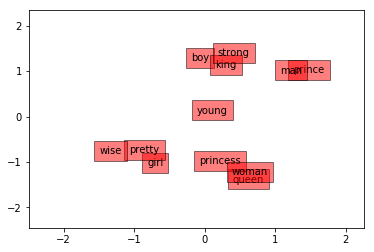

In [27]:
import matplotlib.pyplot as plt

## Set vectors
vectors = embeddings_after_input


# Build dataframe for vectors corrosponding to unique words where first column will be word.
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = unique_words
w2v_df = w2v_df[['word', 'x1', 'x2']]


# Plot the vectors
fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2), bbox={'facecolor':'red', 'alpha':0.5, 'pad':5})
    
# w2v_df = pd.DataFrame(vec_before, columns = ['x1', 'x2'])
# w2v_df['word'] = unique_words
# w2v_df = w2v_df[['word', 'x1', 'x2']]
# for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
#     ax.annotate(word, (x1,x2), bbox={'facecolor':'blue', 'alpha':0.5, 'pad':5})

    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10, 10)

plt.show()

### Advanced Experiments
- Tune hyperparameters to see if you can get better representations
- Try to add more sentences using the same vocabulary (or expanding the vocabulary only slightly) to see if you can learn better representations